In [2]:
# we need to read frames from the movie
# so we install opencv-python - change the next cell type to "Code"
# This file is from https://github.com/OpenPIV/openpiv-python-examples/blob/main/notebooks/analyse_movie.ipynb

In [5]:
# !pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 MB 6.3 MB/s eta 0:00:00:00:0100:01


In [6]:
import cv2

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from openpiv import pyprocess, piv

In [19]:
piv.simple_piv?

Signature: piv.simple_piv(im1, im2, plot=True)
Docstring:
Simplest PIV run on the pair of images using default settings

piv(im1,im2) will create a tmp.vec file with the vector filed in pix/dt
(dt=1) from two images, im1,im2 provided as full path filenames
(TIF is preferable, whatever imageio can read)
File:      ~/miniconda3/envs/scwaves/lib/python3.9/site-packages/openpiv/piv.py
Type:      function


In [ ]:
vidcap = cv2.VideoCapture('DATA/closedcellday_2022_09_06.mp4')
success, image1 = vidcap.read()
count = 0
U = []
V = []

while success and count < 10:
    # cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success, image2 = vidcap.read()
    # print('Read a new frame: ', success)
    if success:
        x,y,u,v = piv.simple_piv(image1.sum(axis=2), image2.sum(axis=2),plot=True);
        image1 = image2.copy()
        count += 1
        U.append(u)
        V.append(v)

In [12]:
U = np.stack(U)
Umean = np.mean(U, axis=0)
V = np.stack(V)
Vmean = np.mean(V,axis=0)

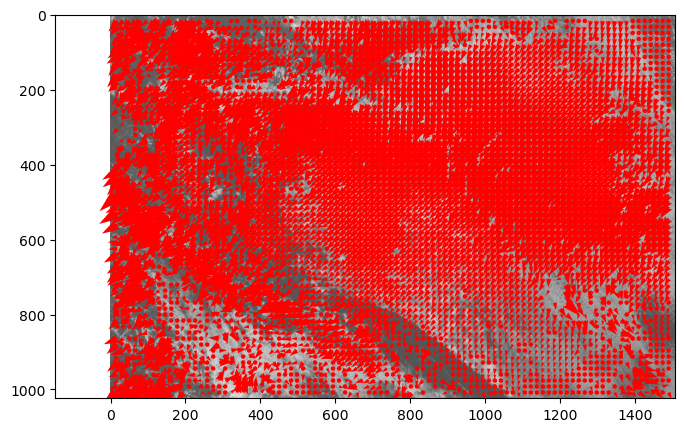

In [18]:
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(image1,alpha=0.7)
ax.quiver(x,y,Umean,Vmean,scale=300,color='r',width=.008)
# plt.show()
plt.plot(np.mean(Umean,axis=1)*20,y[:,0],color='y',lw=3)